In [10]:
from IPython.display import Image
Image(url = "https://media.istockphoto.com/id/1135037442/vector/folder-with-cash-coins-cashier-check-coffee-cup.jpg?s=612x612&w=0&k=20&c=Zakx4zVkxqCNQPdqUlPwTyn3npRE96lUe1Qrxn2GeAk=")

In [58]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [15]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
data.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


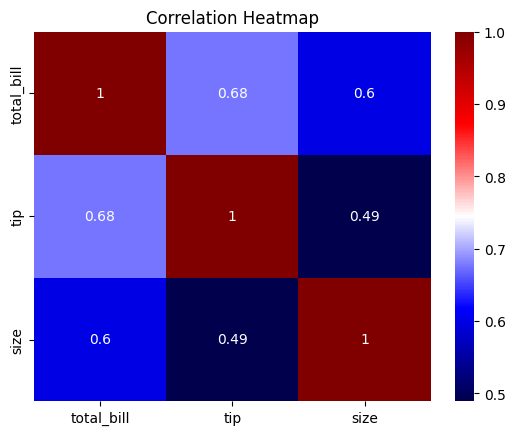

In [32]:
corr_matr = data.corr(numeric_only = True)
display(corr_matr)
sns.heatmap(corr_matr, annot=True, cmap='seismic')
plt.title("Correlation Heatmap")
plt.show()

# Outlier Detection with Boxplot

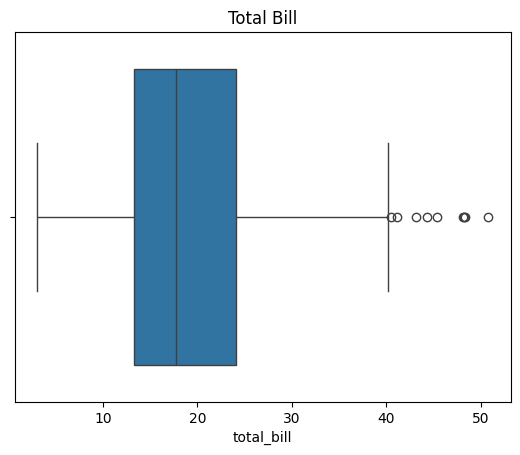

In [36]:
sns.boxplot( x = data["total_bill"])
plt.title("Total Bill")
plt.show()

# **Univariate Visualizations**

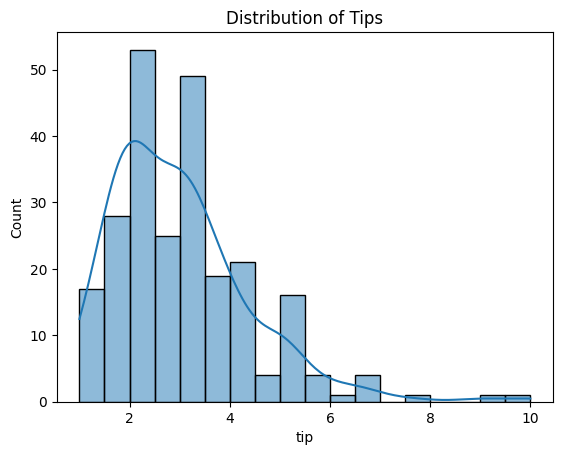

In [39]:
sns.histplot(data["tip"], kde = True)
plt.title("Distribution of Tips")
plt.show()

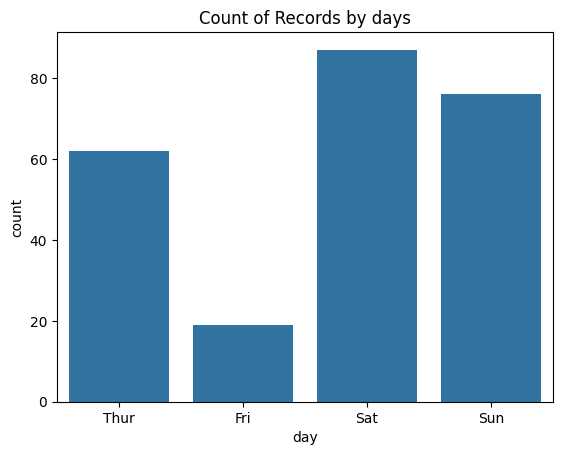

In [40]:
sns.countplot(data = data, x = 'day')
plt.title("Count of Records by days")
plt.show()

#  Bivariate Visualizations

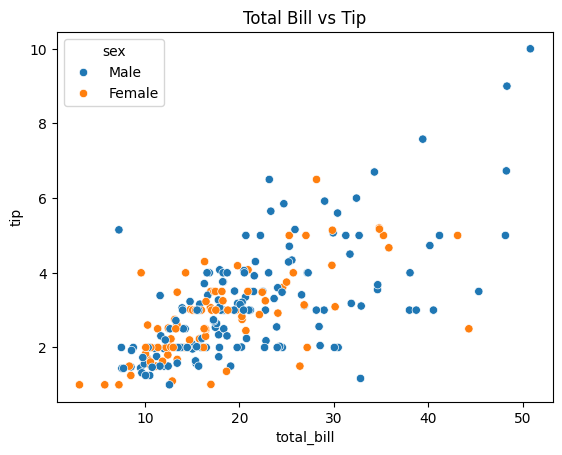

In [51]:
sns.scatterplot(data = data, x = 'total_bill', y = 'tip', hue = 'sex')
plt.title("Total Bill vs Tip")
plt.show()

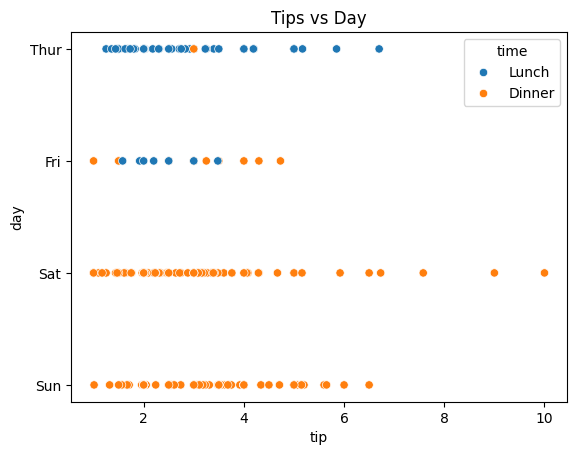

In [54]:
sns.scatterplot( data =data, x = 'tip', y = 'day', hue = 'time')
plt.title("Tips vs Day")
plt.show()

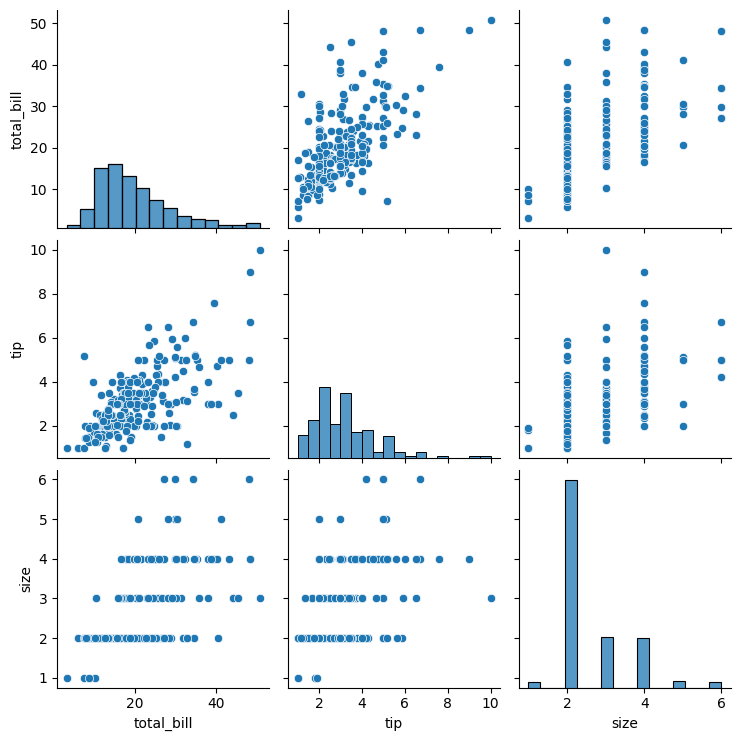

In [55]:
sns.pairplot(data)
plt.show()

# Simple Linear Regression

In [66]:
X = data[['total_bill']]
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])

Intercept: 1.0891075415709737
Slope: 0.09450882621988883


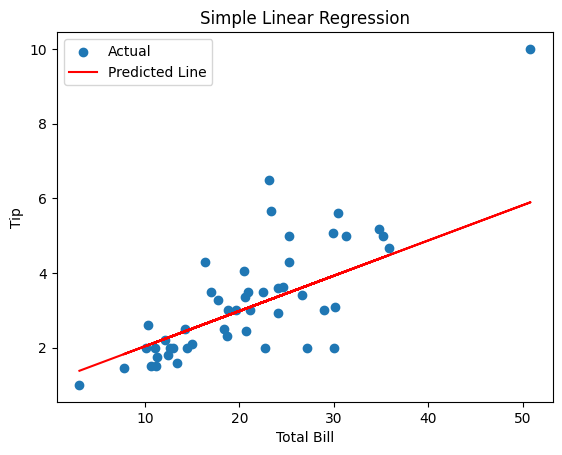

In [67]:
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, model.predict(X_test), color='red', label='Predicted Line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

# Multiple Linear Regression

In [70]:
data['sex_encoded'] = data['sex'].map({'Male': 0, 'Female':1})
a = data[['total_bill', 'sex_encoded', 'size']]
b = data['tip']

X_train, X_test, y_train, y_test = train_test_split(a,b, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train, y_train)

print("Coeffecients : ", model.coef_)
print("Intercept :", model.intercept_)

Coeffecients :  [0.07826719 0.06771179 0.25474697]
Intercept : 0.7302015004374414
